In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

import warnings
warnings.filterwarnings('ignore')

In [18]:
adata_dir = "data_level_1/adata/"
he_image_dir = "data_level_1/he_registered_old/"
pc_dir = "data_level_1/phenocycler_registered/"

In [5]:
sample = 'X1'
adata = sc.read_h5ad(adata_dir + f'{sample}.h5ad')
he_image = plt.imread(he_image_dir + f'{sample}.tiff')

In [20]:
slide_id = adata.obs['Slide_ID'][0]
adata.uns['spatial'][slide_id]['images']['he_downscaled_aligned'] = he_image  
adata.uns['spatial'][slide_id]['scalefactors']['tissue_he_downscaled_aligned_scalef'] = 1

In [39]:
for i in range(13):
    pc_image = plt.imread(pc_dir + f"Phenocycler_Channel{(i+1):02}_{sample}_Level2_registered.tiff")
    adata.obs[f'Phenocycler_Channel{i+1}'] = [pc_image[int(j), int(i)] for i, j in adata.obsm["spatial"]]
pc_image.shape, he_image.shape

((6939, 5252), (6939, 5252, 3))

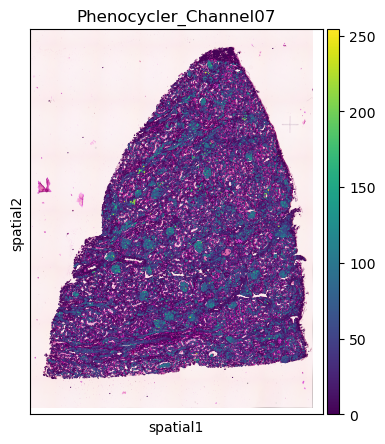

In [36]:
i = 6

fig, ax = plt.subplots(figsize=(5, 5))
slide_id = adata.obs['Slide_ID'][0]
sc.pl.spatial(adata,
              library_id = slide_id,
              img_key = 'he_downscaled_aligned',
              color = f'Phenocycler_Channel{i+1}',
              size = .5,
              ax = ax,
              show = True)

In [43]:
adata.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,Phenocycler_Channel01,Phenocycler_Channel03,Phenocycler_Channel04,Phenocycler_Channel05,Phenocycler_Channel06,Phenocycler_Channel09,Phenocycler_Channel10,Phenocycler_Channel11,Phenocycler_Channel12,Phenocycler_Channel13
cell_CR4f0dee9aa-180889,6716.283222,17512.357444,25.470509,3,9,0.8364,4.830,10.76,0.9854,0.9378,...,0,0,0,0,0,0,0,0,0,0
cell_CR4f0dee9aa-183757,7697.138350,16902.679909,18.473602,1,22,0.7420,2.543,29.65,0.9789,0.9609,...,0,0,0,0,0,0,0,0,0,0
cell_CR4f0dee9aa-187490,7335.689686,18178.449143,18.799759,1,7,0.4232,1.602,16.54,0.9828,0.9514,...,0,0,0,0,0,0,0,0,0,0
cell_CR4f0dee9aa-187496,7061.050273,18457.773273,18.014096,3,11,0.6778,6.409,16.23,0.9928,0.9855,...,0,0,0,0,0,0,0,0,0,0
cell_CR4f0dee9aa-189272,9086.320401,17056.009169,19.320583,2,71,0.8252,1.810,86.04,0.9923,0.9634,...,25,0,1,0,7,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR4f0dee9aa-350563,9496.808653,19171.116247,17.450320,2,85,1.4950,1.290,56.86,0.9954,0.8146,...,5,0,2,0,0,0,1,16,0,0
cell_CR4f0dee9aa-350577,8759.875815,18990.748097,19.412288,3,62,0.6434,2.872,96.37,0.9965,0.8300,...,34,0,7,0,93,0,9,24,0,0
cell_CR4f0dee9aa-351239,8876.753061,18579.469848,16.069884,4,33,1.2300,3.551,26.84,0.9980,0.7261,...,7,0,0,0,1,0,0,2,0,0
cell_CR4f0dee9aa-351295,8482.013320,21088.151440,20.003012,1,25,0.7669,1.172,32.60,0.9906,0.7416,...,33,0,0,0,0,0,0,30,0,0


In [ ]:
# show dapi
# LEVEL = 1
# ID = adata.obs.Slide_ID.unique()[0]
# scale_factor = adata.uns["spatial"][ID]["scalefactors"][f"tissue_dapi_LEVEL{LEVEL}_scalef"]
# dapi = adata.uns["spatial"][ID]["images"][f"dapi_LEVEL{LEVEL}"+"_cropped"]
# dapi.shape
# adata.obs['dapi'] = [dapi[int(j), int(i)] for i, j in adata.obsm["spatial"]]
# adata.obsm["spatial"].min(axis=0), adata.obsm["spatial"].max(axis=0) + 350